# Sentiment Analysis

### ...using TextBlob

TextBlob module: every word has been labeled with sentiment by linguistic researches. They used terms of polarity (-1 to be very negative, 1 to be very positive) and subjectivity (0 to be fact, 1 to be opinion).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datac = pd.read_pickle('corpus.pkl')
datan = pd.read_pickle('corpusn.pkl')

In [3]:
from textblob import TextBlob

In [4]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [5]:
datac['polarity'] = datac.article.apply(pol)
datac['subjectivity'] = datac.article.apply(sub)

In [6]:
datan['polarity'] = datan.article.apply(pol)
datan['subjectivity'] = datan.article.apply(sub)

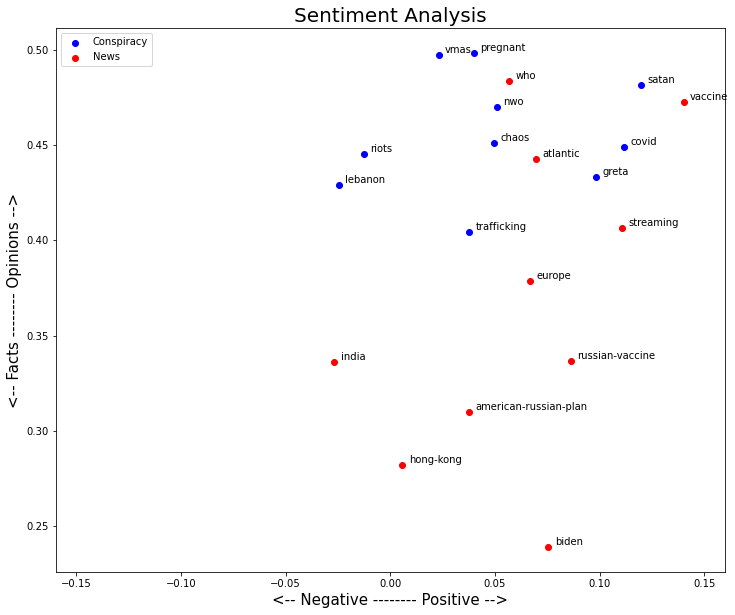

In [7]:
# plot
plt.rcParams['figure.figsize'] = [12,10]
xc = []
yc = []
for i,c in enumerate(datac.index):
    x0 = datac.polarity.loc[c]
    y0 = datac.subjectivity.loc[c]
    xc.append(x0)
    yc.append(y0)
    plt.text(x0+0.003, y0+0.001, datac.index[i], fontsize=10)

plt.scatter(xc, yc, color='blue')
plt.xlim(-.16, .16)

xn = []
yn = []
for i,c in enumerate(datan.index):
    x0 = datan.polarity.loc[c]
    y0 = datan.subjectivity.loc[c]
    xn.append(x0)
    yn.append(y0)
    plt.text(x0+0.003, y0+0.001, datan.index[i], fontsize=10)

plt.scatter(xn, yn, color='red')

plt.legend(['Conspiracy', 'News'], loc='upper left')
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### And what about opinions?

Using opinions from opinions pages of news.

In [8]:
datao = pd.read_pickle('corpuso.pkl')

In [9]:
datao['polarity'] = datao.opinions.apply(pol)
datao['subjectivity'] = datao.opinions.apply(sub)

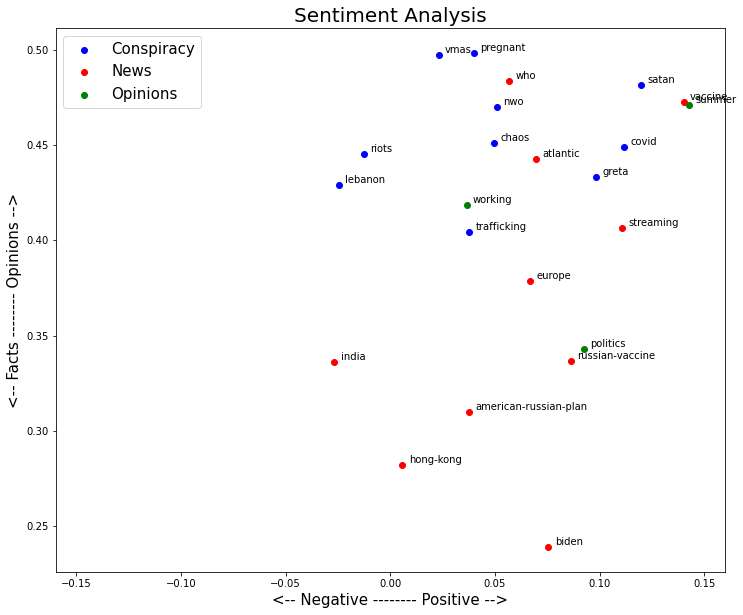

In [10]:
# plot
plt.rcParams['figure.figsize'] = [12,10]
xc = []
yc = []
for i,c in enumerate(datac.index):
    x0 = datac.polarity.loc[c]
    y0 = datac.subjectivity.loc[c]
    xc.append(x0)
    yc.append(y0)
    plt.text(x0+0.003, y0+0.001, datac.index[i], fontsize=10)

plt.scatter(xc, yc, color='blue')

xn = []
yn = []
for i,c in enumerate(datan.index):
    x0 = datan.polarity.loc[c]
    y0 = datan.subjectivity.loc[c]
    xn.append(x0)
    yn.append(y0)
    plt.text(x0+0.003, y0+0.001, datan.index[i], fontsize=10)

plt.scatter(xn, yn, color='red')

xo = []
yo = []
for i,c in enumerate(datao.index):
    x0 = datao.polarity.loc[c]
    y0 = datao.subjectivity.loc[c]
    xo.append(x0)
    yo.append(y0)
    plt.text(x0+0.003, y0+0.001, datao.index[i], fontsize=10)
    
plt.scatter(xo, yo, color='green')

plt.xlim(-.16, .16)
plt.legend(['Conspiracy', 'News', 'Opinions'], loc='upper left', fontsize=15)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Result:  
Conspiracies tend to be more subjective; they lack facts. 


## Let's use Naive-Bayes

In [11]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [12]:
datac['cn'] = [0]*len(datac)
datan['cn'] = [1]*len(datan)

df = pd.concat([datac, datan])
del df['polarity']
del df['subjectivity']
df

,article,cn
riots,The death of George Floyd was as horrific as i...,0
vmas,"Nearly every year, I publish an article about ...",0
satan,"In the past years, The Satanic Temple (TST) la...",0
nwo,Since the outbreak of COVID-19 outside of Chin...,0
covid,The response to the COVID-19 pandemic launched...,0
lebanon,"45 years ago, a horrific civil war broke out i...",0
pregnant,Kathleen Lowrey is an associate professor of a...,0
chaos,"Since late 2008, The Vigilant Citizen has been...",0
greta,"In the matter of a few months, Greta Thunberg ...",0
trafficking,The “Wayfair conspiracy” or “Wayfairgate” has ...,0


In [13]:
stop_words = set(stopwords.words('english'))
vect = TfidfVectorizer(use_idf=True, stop_words=stop_words, lowercase=True, strip_accents='ascii')

In [14]:
X = vect.fit_transform(df.article)
y = df.cn

In [15]:
print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

X.shape:  (20, 5324)
y.shape:  (20,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
classifier = naive_bayes.MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [18]:
roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

1.0

In [19]:
# test in on opinions data
do = pd.DataFrame(datao.opinions)
do

,opinions
summer,"JUST WATCHEDTo stop coronavirus, CDC orders e..."
politics,Opinion by Samantha VinogradUpdated 19...
working,Opinion by Kara AlaimoUpdated 1829 GMT...


In [21]:
import numpy as np
X_do = vect.transform(np.array(do.opinions))

In [22]:
classifier.predict(X_do)

array([1, 1, 1], dtype=int64)

### Result: 
Well-written opinions are not classified as conspiracies. They are fact-based.